Grafica PoS individual


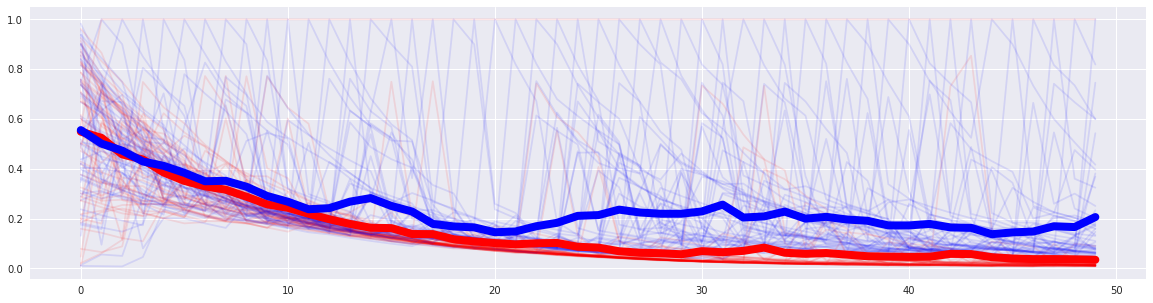

Grafica PoS media por grupos
Porcentaje grupos con distinta media de crimen
[0.5 0.5]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1


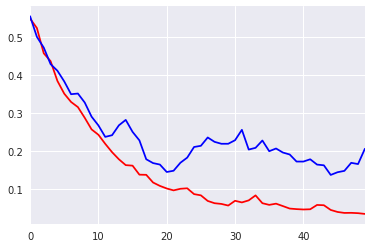

In [106]:
#Diferencia entre la distribucion del crimen

#En este experimento la poblacion esta dividida en dos grupos, cada 
#grupo sufre un evento criminal por periodo, en el primer grupo un 
#sujeto se fija para ser la vitima del crimen en todos los periodos
#y en el segundo se escoge aleatoriamente.

import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

n = 100  # numero de personas
T = 50  # numero de periodos
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 2  # cantidad de grupos con distinta tasa de crimen por periodo

q = np.array([0.5, 0.5])  # porcentajes de los grupos en la poblacion total

# calculo de la Pos en el intante t
# en t=0 es s
St[0] = s
#fijamos el sujeto del grupo 1
sujeto1=np.random.randint(n/2)
for t in range(1,T):
    # Al inicio de cada periodo aplicamos la perdida de memoria
    s = psi * s
    salto = []  # vector en el cual esta la gente con la que ya hubo comunicacion
    #fijamos el sujeto del grupo 2 en el periodo t
    sujeto2=np.random.randint(n/2,n)
    for k in range(n/2):
        # si k ya se comunico con alguien se continua con la siguiente persona
        if k in salto:
            continue
        if len(salto)==len(s)/2-1:
            continue
        # Flag para modelar interacción social
        intSoc = bool(random.getrandbits(1))  # aleatoriamente escoge verdadero o falso
        if intSoc == True:
            # seleccionamos con quien se da la comunicacion
            j = np.random.randint(0, n/2)
            while j == k or j in salto:
                j = np.random.randint(0, n/2)
            s[k] = s[k] - mu * (s[k] - s[j])
            s[j] = s[j] - nu * (s[j] - s[k])
            # añadimos a la lista de los que ya se comunicaron a las personas k y j
            salto.append(j)
            salto.append(k)
    salto = []
    for k in range(n/2,n):
        # si k ya se comunico con alguien se continua con la siguiente persona
        if k in salto:
            continue
        if len(salto)==len(s)/2-1:
            continue
        # Flag para modelar interacción social
        intSoc = bool(random.getrandbits(1))  # aleatoriamente escoge verdadero o falso
        if intSoc == True:
            # seleccionamos con quien se da la comunicacion
            j = np.random.randint(n/2, n)
            while j == k or j in salto:
                j = np.random.randint(n/2, n)
            s[k] = s[k] - mu * (s[k] - s[j])
            s[j] = s[j] - nu * (s[j] - s[k])
            # añadimos a la lista de los que ya se comunicaron a las personas k y j
            salto.append(j)
            salto.append(k)
        #Crimen
    s[sujeto1]=1
    s[sujeto2]=1
        
    St[t] = s
%matplotlib inline 
plt.figure(figsize=(20,5))
print("Grafica PoS individual")
plt.plot(St[:,np.arange(n/2)],'red',alpha=0.1)
plt.plot(St[:,np.arange(n/2,n)],'blue',alpha=0.1)
plt.plot(np.mean(St[:,np.arange(n/2)],axis=1),'red',linewidth=8)
plt.plot(np.mean(St[:,np.arange(n/2,n)],axis=1),'blue',linewidth=8)
plt.show()
print("Grafica PoS media por grupos")
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
sns.set(color_codes=True)
sns.tsplot(data=np.mean(St[:,np.arange(n/2)],axis=1),color="red")
sns.tsplot(data=np.mean(St[:,np.arange(n/2,n)],axis=1),color="blue")